In [36]:
import numpy as np
import matplotlib.pyplot as plt

date: 01/31/2020

# 3 - Avoiding Overfitting Through Regularization

"With four parameters I can fit an elephant, and with five I can make him wiggle his trunk" (John von Newmann)

3.1: Overfitting

3.2: 2-norm regularization

3.3: 1-norm regularization and feature selection

## 3.1 Overfitting

A common danger in machine learning is *overfitting*--producing a model that performs well on the data you train it on but generalizes poorly to any new data.
Models that are too complex lead to overfitting and don't generalize well beyond the data they were trained on. 
So how de we make sure our models aren't too complex? 
The most fundamental approach involves using different data to train the model and to test the model.

Let's look at an example. First, let's generate some nonlinear data, based on a simple quadratic equation (plus some Gaussian noise)

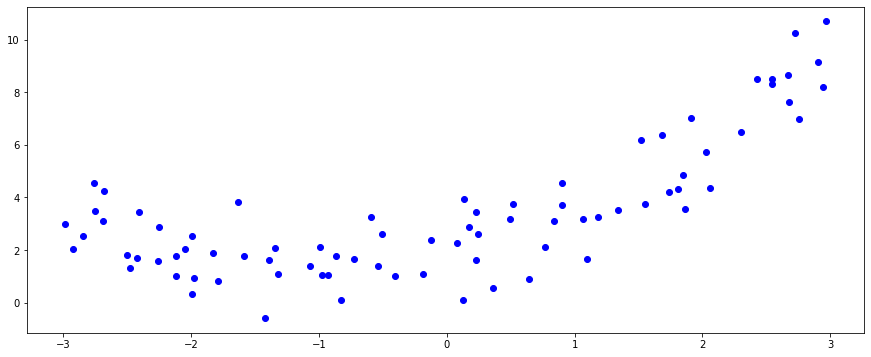

In [181]:
m = 50
#x = 2*np.random.rand(m,1)
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2+x+2+np.random.randn(m,1)
plt.figure(figsize=(15,6))
plt.plot(x,y,'bo')

Let us split the dataset, so that one half of it is used to train the model, after which we measure the model's performance on the remaining half.

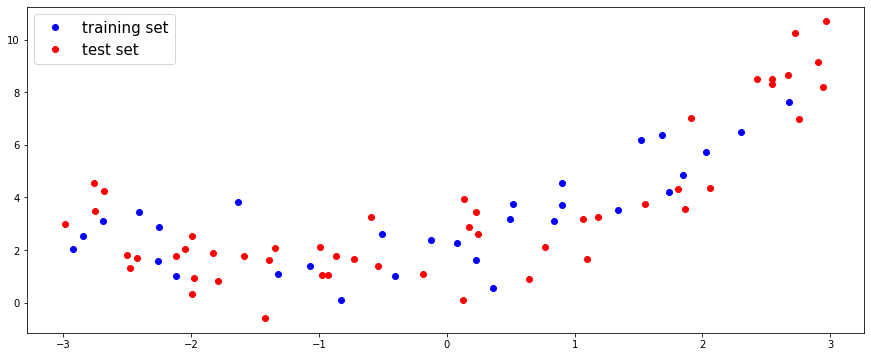

In [207]:
x_train,y_train = x[:30],y[:30] #first 30
x_test,y_test = x[30:],y[30:] #last 20

plt.figure(figsize=(15,6))
plt.plot(x_train,y_train,'bo',label='training set')
plt.plot(x_test,y_test,'ro',label='test set')
plt.legend(fontsize=15)

Let's fit degree-d polynomials to the data

$$
y = \theta_0 + \theta_1x+\theta_2x^2 + \cdots + \theta_d x^d
$$

In [256]:
max_degree = 20
degree_list = [d for d in range(max_degree+1)] #[0,1,2,3,...,max_degree]

MSE_test = np.zeros(max_degree+1)
MSE_train = np.zeros(max_degree+1)
for degree in degree_list: #fit a polynomial of degree d
    X_train = x_train**degree_list[:degree+1]
    X_test = x_test**degree_list[:degree+1]
    theta = np.linalg.lstsq(X_train,y_train,rcond=None)[0]
    MSE_train[degree]=np.linalg.norm(y_train-X_train@theta)/len(x_train)
    MSE_test[degree]=np.linalg.norm(y_test-X_test@theta)/len(x_test)

Text(0, 0.5, 'MSE')

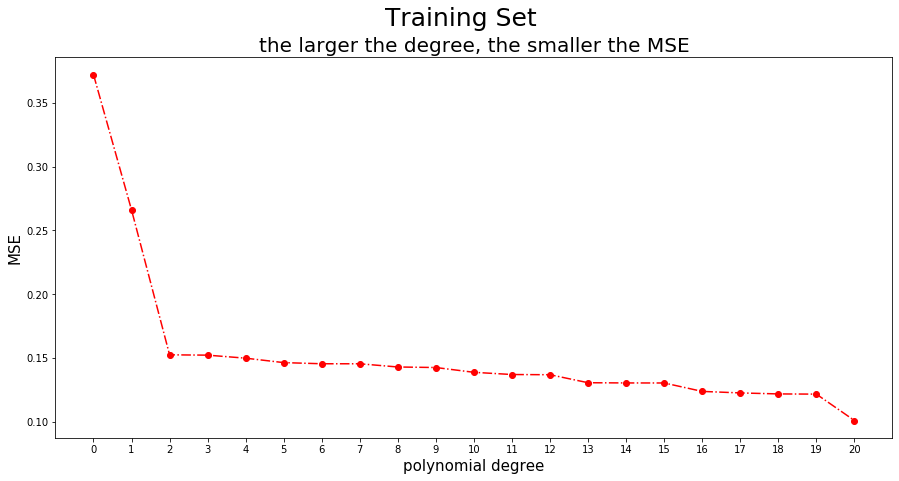

In [257]:
plt.figure(figsize=(15,7))
plt.plot(degree_list,MSE_train,'ro-.')
plt.title('the larger the degree, the smaller the MSE',fontsize=20)
plt.suptitle('Training Set',fontsize=25)
plt.xlabel('polynomial degree',fontsize=15)
plt.xticks(degree_list)
plt.ylabel('MSE',fontsize=15)

Let's plot the best fit degree-20 polynomial

Text(0.5, 1.0, 'MSE for the test set is 1741.314087573066')

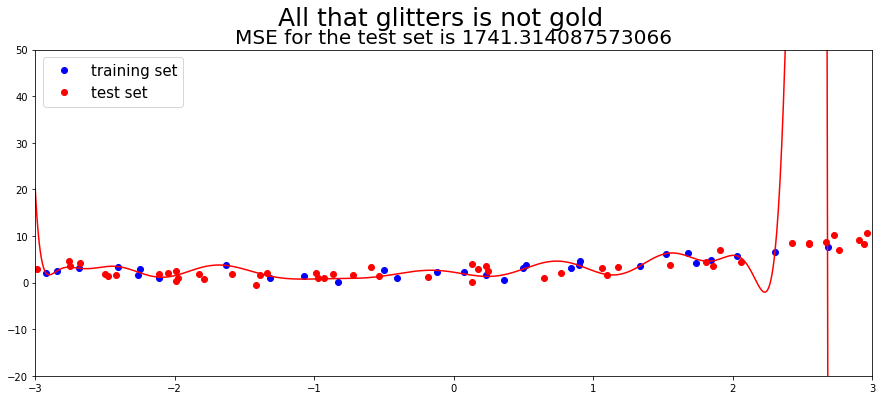

In [220]:
plt.figure(figsize=(15,6))

plt.plot(x_train,y_train,'bo',label = 'training set') #plot training set
plt.plot(x_test,y_test,'ro',label = 'test set') #plot test set
plt.legend(fontsize=15)

x_plot = np.linspace(-3,3,1000) #plot polynomial
x_plot = x_plot[:,None] #keep x_plot as a column vector
X_plot = x_plot**degree_list
y_plot = X_plot@theta
plt.plot(x_plot,y_plot,'r-')
plt.ylim(-20,50)
plt.xlim(-3,3)


plt.suptitle('All that glitters is not gold',fontsize=25)
X_test = x_test**degree_list
MSE_test_set = np.linalg.norm(y_test-X_test@theta)/len(x_test)
plt.title('MSE for the test set is '+str(MSE_test_set),fontsize=20)

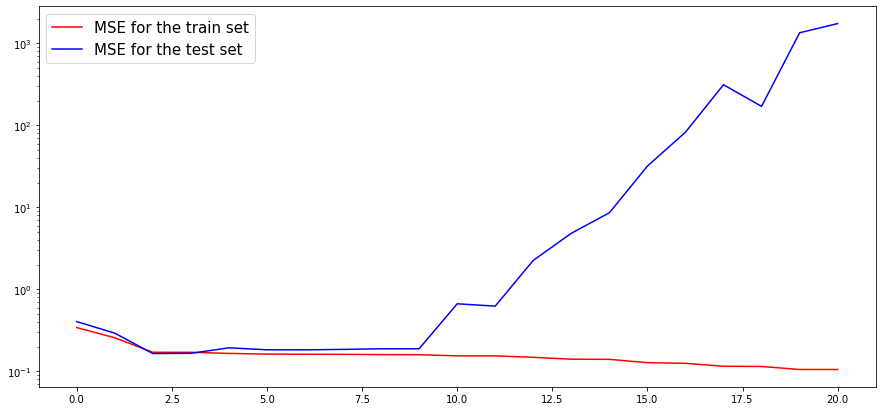

In [221]:
plt.figure(figsize=(15,7))
plt.semilogy(degree_list,MSE_train,'r-',label='MSE for the train set') #semilogarithmic plot
plt.semilogy(degree_list,MSE_test,'b-',label='MSE for the test set')
plt.legend(fontsize = 15)

## 3.2 Detecting Overfitting: Learning Curves

Learning curves are plots of the model's performance on the training set and the test set as a function of the training set size.
Learning curves is one way to tell when a model is too simple or too complex.

In [252]:
MSE_train = np.zeros(35)
MSE_test = np.zeros(35)

train_sizes = [s for s in range(35)]
deg = 20

for train_size in train_sizes: 
    x_train,y_train = x[:train_size+1],y[:train_size+1]
    x_test,y_test = x[train_size+1:],y[train_size+1:]
    
    #train the model (polynomial)
    X_train = x_train**[d for d in range(deg)]
    theta = np.linalg.lstsq(X_train,y_train,rcond=None)[0]
    #MSE for the training set
    MSE_train[train_size] = np.linalg.norm(y_train-X_train@theta)/(train_size)
    #MSE for the test set
    X_test = x_test**[d for d in range(deg)]
    MSE_test[train_size] = np.linalg.norm(y_test-X_test@theta)/(m-train_size)

C:\Users\javier.perez-alvaro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


Text(0, 0.5, 'MSE')

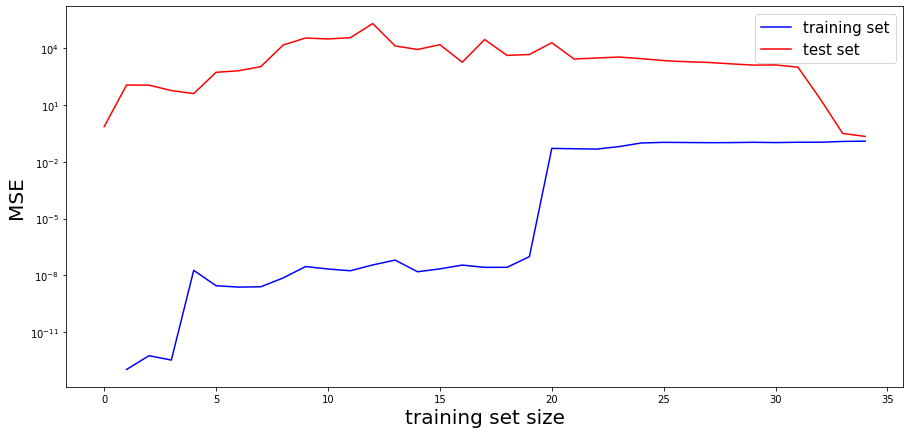

In [253]:
plt.figure(figsize=(15,7))
plt.semilogy(train_sizes,MSE_train,'-b',label='training set')
plt.semilogy(train_sizes,MSE_test,'r-',label='test set')
plt.legend(fontsize=15)
plt.xlabel('training set size',fontsize=20)
plt.ylabel('MSE',fontsize=20)

There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. 

If you used a much larger training set, however, the two curves would continue to get closer